<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [10]:
## Task 1: Become familiar with the dataset
'''
The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's
'''


"\nThe following describes the dataset variables:\n\n·      CRIM - per capita crime rate by town\n\n·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.\n\n·      INDUS - proportion of non-retail business acres per town.\n\n·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\n\n·      NOX - nitric oxides concentration (parts per 10 million)\n\n·      RM - average number of rooms per dwelling\n\n·      AGE - proportion of owner-occupied units built prior to 1940\n\n·      DIS - weighted distances to five Boston employment centres\n\n·      RAD - index of accessibility to radial highways\n\n·      TAX - full-value property-tax rate per $10,000\n\n·      PTRATIO - pupil-teacher ratio by town\n\n·      LSTAT - % lower status of the population\n\n·      MEDV - Median value of owner-occupied homes in $1000's\n"

In [39]:
boston_df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV', 'Age-Class'],
      dtype='object')

In [40]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,Age-Class
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


In [8]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [9]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [ ]:
#Task 2: Generate Descriptive Statistics and Visualizations
'''
For all visualizations, please include a title in each graph and appropriate labels
Generate the following and explain your findings:
- For the "Median value of owner-occupied homes" provide a boxplot
- Provide a  bar plot for the Charles river variable
- Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
- Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
- Create a histogram for the pupil to teacher ratio variable
'''

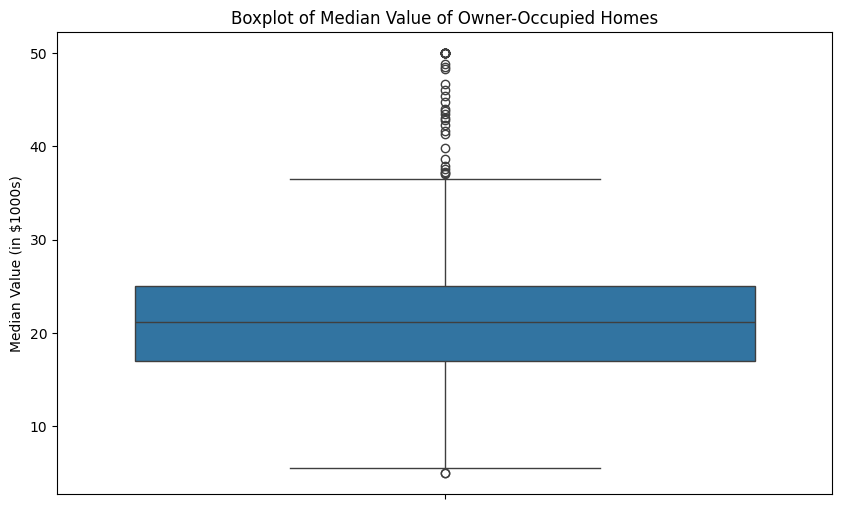

In [12]:
# For the "Median value of owner-occupied homes" provide a boxplot
pyplot.figure(figsize=(10, 6))
sns.boxplot(y=boston_df['MEDV'])
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes')
pyplot.ylabel('Median Value (in $1000s)')
pyplot.show()

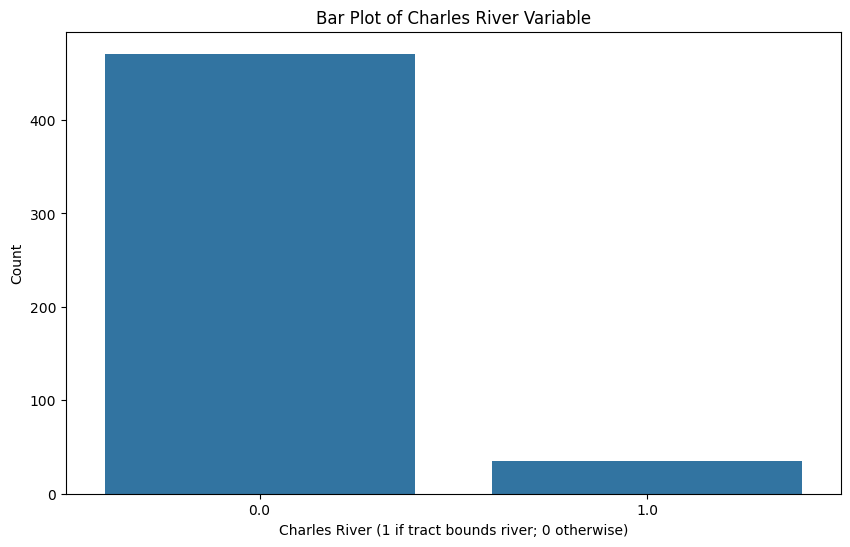

In [13]:
# Provide a  bar plot for the Charles river variable
# Create a bar plot for the 'Charles river' variable (CHAS)
pyplot.figure(figsize=(10, 6))
sns.countplot(x=boston_df['CHAS'])
pyplot.title('Bar Plot of Charles River Variable')
pyplot.xlabel('Charles River (1 if tract bounds river; 0 otherwise)')
pyplot.ylabel('Count')
pyplot.show()


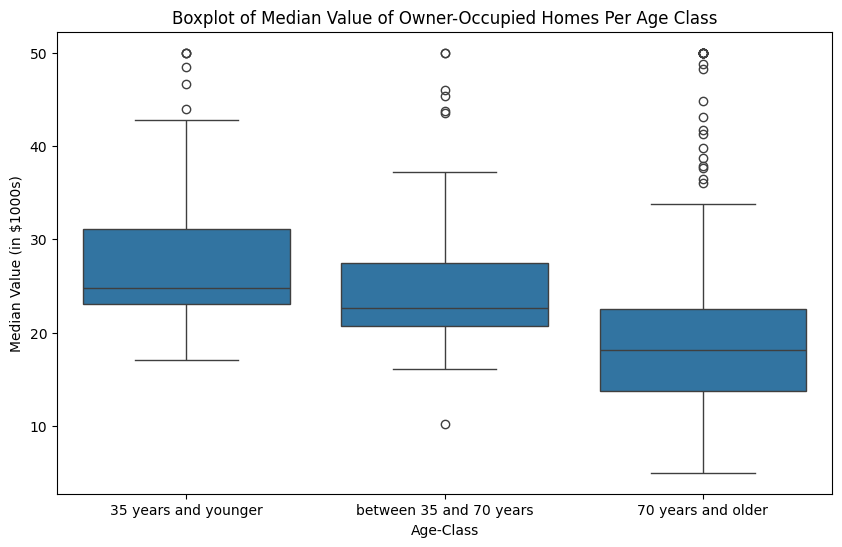

In [34]:
# Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df['Age-Class'] = ""
boston_df.loc[boston_df['AGE']<=35,'Age-Class'] = "35 years and younger"
boston_df.loc[(boston_df['AGE']>35) & (boston_df['AGE']<70), 'Age-Class'] = "between 35 and 70 years"
boston_df.loc[boston_df['AGE']>=70,'Age-Class'] = "70 years and older"

# Define the order of the categories
age_class_order = ["35 years and younger", "between 35 and 70 years", "70 years and older"]

pyplot.figure(figsize=(10, 6))
sns.boxplot(y=boston_df['MEDV'], x=boston_df['Age-Class'], order=age_class_order)
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes Per Age Class')
pyplot.ylabel('Median Value (in $1000s)')
pyplot.show()

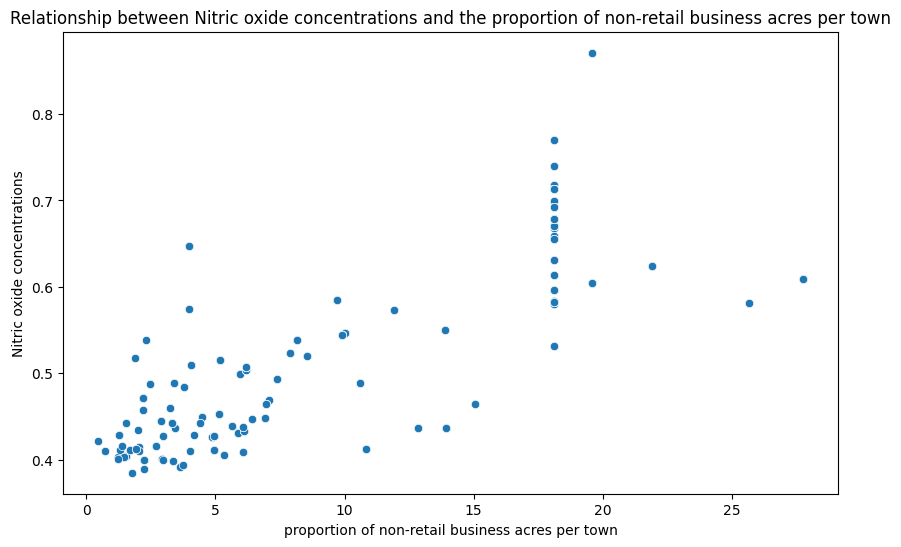

In [37]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
pyplot.figure(figsize=(10, 6))
sns.scatterplot(x=boston_df['INDUS'], y=boston_df['NOX'])
pyplot.title('Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')
pyplot.xlabel('proportion of non-retail business acres per town')
pyplot.ylabel('Nitric oxide concentrations')
pyplot.show()

# General tendency for NOX to increase but there are some specific areas that require expert advice: 
# 1) When non-retial proportion is low & NOX is high
# 2) Around non-retial proportion IS 18 where NOX is highly variable

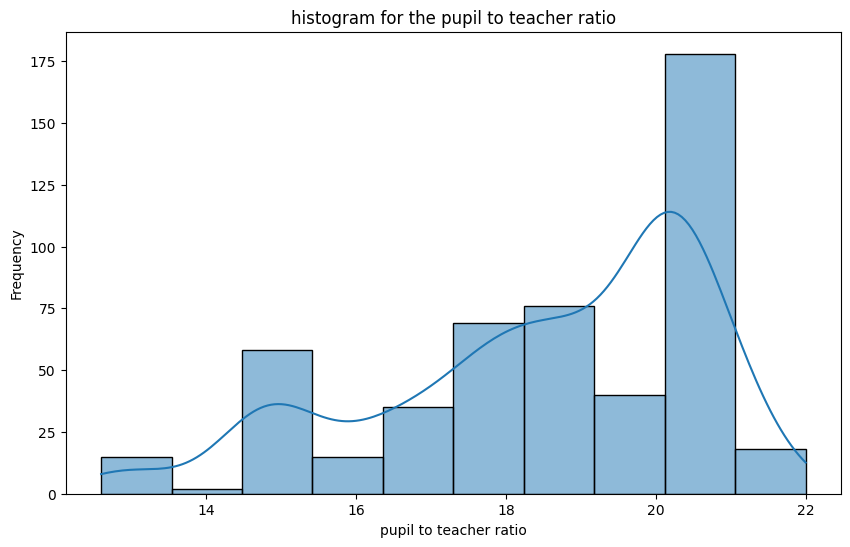

In [42]:
# Create a histogram for the pupil to teacher ratio variable
pyplot.figure(figsize=(10, 6))
sns.histplot(boston_df['PTRATIO'], bins=10, kde=True)
pyplot.title('histogram for the pupil to teacher ratio')
pyplot.xlabel('pupil to teacher ratio')
pyplot.ylabel('Frequency')
pyplot.show()


In [ ]:
# Task 3: Use the appropriate tests to answer the questions provided.
'''
For each of the following questions;
- Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
- Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
- Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
- What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:
- State your hypothesis.
- Use α = 0.05
- Perform the test Statistics.
- State the conclusion from the test.
'''

In [43]:
# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

# H0: There is no difference in Median House Value based on its location wrt Charles River
# H1: There is difference in Median House Value based on its location wrt Charles River

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'], boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)

# pvalue=7.390623170519905e-05 means that we can reject null hypothesis that there is no difference in mean prices based on CHAS.

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

In [44]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

scipy.stats.levene(boston_df[boston_df['Age-Class'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['Age-Class'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['Age-Class'] == '70 years and older']['MEDV'], 
                   center='mean')

# Since the p-value is more than 0.05, the variance are equal

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [47]:
# H0: There is no difference in Median House Value for each proportion of owner occupied units built prior to 1940 (AGE)
# H1: There is difference in Median House Value for each proportion of owner occupied units built prior to 1940 (AGE)

thirtyfive_lower = boston_df[boston_df['Age-Class'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['Age-Class'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['Age-Class'] == '70 years and older']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))
# Since the p-value is less than 0.05, we reject the null hypothesis as there is a significant evidence that at least one of the means differ.


F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In [48]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

# H0: There is no difference in Nitric oxide concentrations and proportion of non-retail business acres per town
# H1: There is difference in Nitric oxide concentrations and proportion of non-retail business acres per town

scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
# Since the p-value (Sig. (2-tailed) < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between NOX and INDUS


PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [49]:
# What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

# H0: There is no impact of weighted distances to five Boston employment centres to MEDV
# H1: There is impact of weighted distances to five Boston employment centres to MEDV

X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

# the p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 18 Nov 2024   Prob (F-statistic):           1.21e-08
Time:                        10:47:56   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""